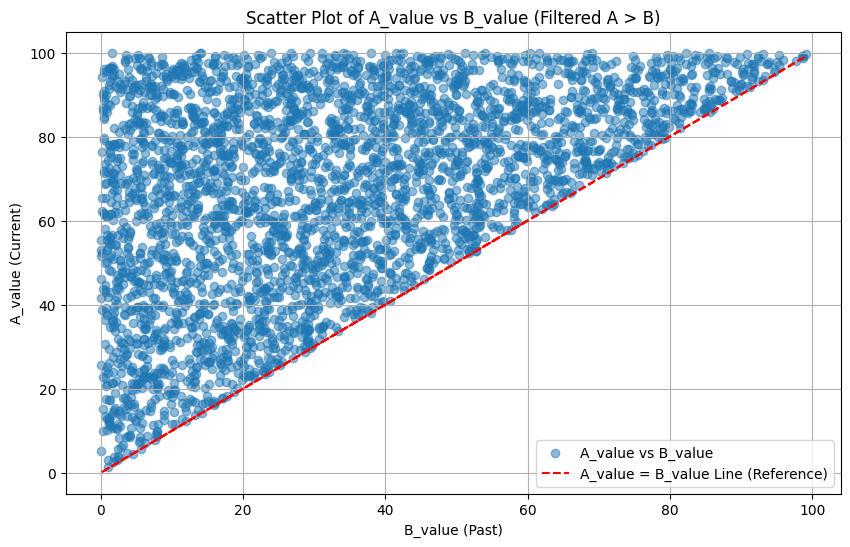

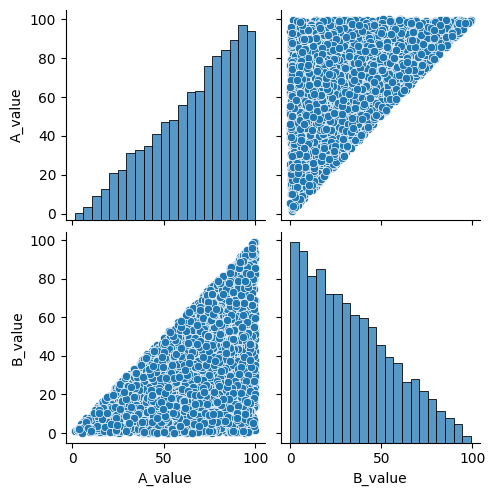

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_samples = 10000
# Generate uniform random numbers for A and B within a reasonable range
A_uniform = np.random.uniform(-10, 110, num_samples)
B_uniform = np.random.uniform(-10, 110, num_samples)

# Filter only cases where A > B
valid_indices = A_uniform > B_uniform
A_filtered = A_uniform[valid_indices]
B_filtered = B_uniform[valid_indices]

df_filtered = pd.DataFrame({'A_value': A_filtered, 'B_value': B_filtered})

df_filtered.to_csv('A_greater_B.csv', index=False)


def plot_stuff(df):
    # Scatter plot to visualize filtered data between 0 and 100
    df = df[(df['A_value'] >= 0) & (df['A_value'] <= 100) & (df['B_value'] >= 0) & (df['B_value'] <= 100)]
    plt.figure(figsize=(10,6))
    plt.scatter(df['B_value'], df['A_value'], alpha=0.5, label="A_value vs B_value")
    plt.plot(df['B_value'], df['B_value'], color='red', linestyle='--', label="A_value = B_value Line (Reference)")
    plt.xlabel("B_value (Past)")
    plt.ylabel("A_value (Current)")
    plt.title("Scatter Plot of A_value vs B_value (Filtered A > B)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Pairplot for the filtered dataset
    sns.pairplot(df)
    plt.show()
    
    return df

df_filtered = plot_stuff(df_filtered)



In [2]:
import numpy as np
import pandas as pd
import glob
from model.ctabgan import CTABGAN

synthesizer =  CTABGAN(df_filtered,
                 test_ratio = 0.20,
                 categorical_columns = [], 
                 log_columns = [],
                 mixed_columns= {},
                 general_columns = [],
                 non_categorical_columns = [],
                 integer_columns = [],
                 problem_type= None) 

In [4]:
synthesizer.fit(60)

  0%|          | 0/60 [00:04<?, ?it/s]


AttributeError: 'DataTransformer' object has no attribute 'get_transformers'

In [ ]:
syn = synthesizer.generate_samples(10000)
syn.head()

In [ ]:
plot_stuff(syn)